<a href="https://colab.research.google.com/github/viththiananth/20220922-Deep_Learning_Assignment-Neural_Network_on_MNIST/blob/main/Neural_Network_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using ANN:

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

#Split the date into training and test dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


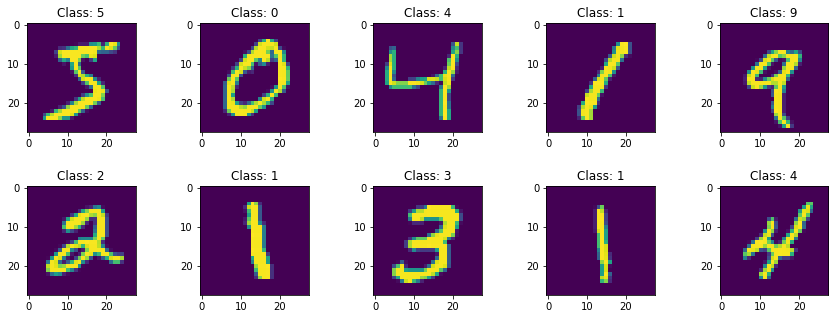

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

8


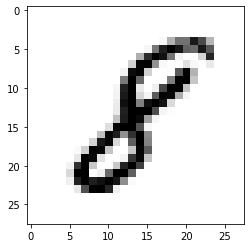

In [5]:
   #To visualize these numbers, we can get help from matplotlib.
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

8


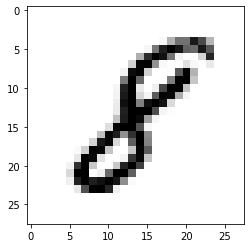

In [6]:
# Normalize and print the image
x_train1 = x_train.astype('float32')
x_test1 = x_test.astype('float32')
x_train1 /= 255
x_test1 /= 255

print(y_train[image_index]) # The label is 8
plt.imshow(x_train1[image_index], cmap='Greys')

In [7]:
#Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(128, activation=tf.nn.sigmoid))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=20, batch_size=200,validation_data=(x_test, y_test)).history

Epoch 1/20
300/300 [==============================] - 2s 5ms/step - loss: 0.8275 - accuracy: 0.7454 - val_loss: 0.3022 - val_accuracy: 0.9125
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.3561 - accuracy: 0.8959 - val_loss: 0.2213 - val_accuracy: 0.9335
Epoch 3/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2901 - accuracy: 0.9139 - val_loss: 0.1916 - val_accuracy: 0.9437
Epoch 4/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2498 - accuracy: 0.9260 - val_loss: 0.1735 - val_accuracy: 0.9472
Epoch 5/20
300/300 [==============================] - 2s 6ms/step - loss: 0.2253 - accuracy: 0.9323 - val_loss: 0.1596 - val_accuracy: 0.9535
Epoch 6/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2036 - accuracy: 0.9382 - val_loss: 0.1430 - val_accuracy: 0.9582
Epoch 7/20
300/300 [==============================] - 2s 8ms/step - loss: 0.1962 - accuracy: 0.9416 - val_loss: 0.1419 - val_accuracy: 0.9586
Epoch 

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (200, 784)                0         
                                                                 
 dense (Dense)               (200, 128)                100480    
                                                                 
 dropout (Dropout)           (200, 128)                0         
                                                                 
 dense_1 (Dense)             (200, 128)                16512     
                                                                 
 dropout_1 (Dropout)         (200, 128)                0         
                                                                 
 dense_2 (Dense)             (200, 10)                 1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trai

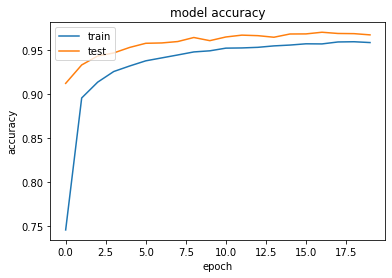

In [11]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

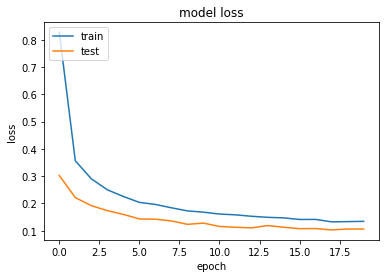

In [12]:
#Loss along with epochs
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

**Omit Overfitting**


---


* Method 1: Data augmentation
* Method 2:  Simplifying neural network
* Method 3: Weight regularization
* Method 4: Dropouts
* Method 5: Early stopping 
* Add more data
* Add regularization (mostly dropout, L1/L2 regularization are also possible)
* Reduce architecture complexity.

### Optimization Methods

---

1. Cross-Validation
2. Image Augmentation
3. Regularization (Dropout Layer)
4. Increasing the number of epochs
5. Adding more Dense layer
6. Adding CNN layers

# Using CNN

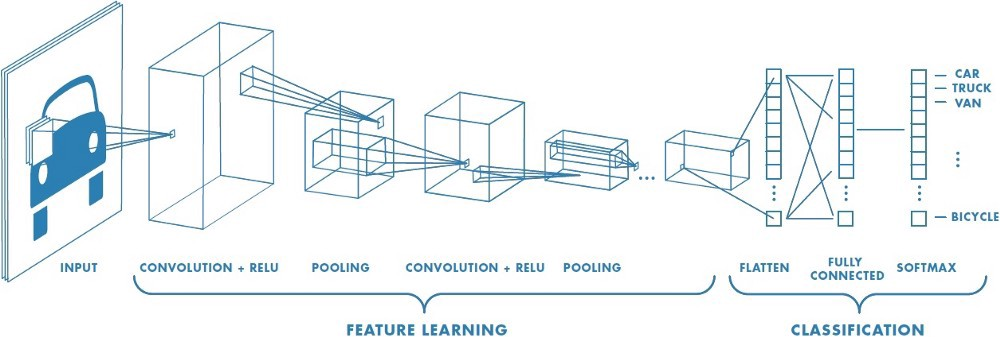

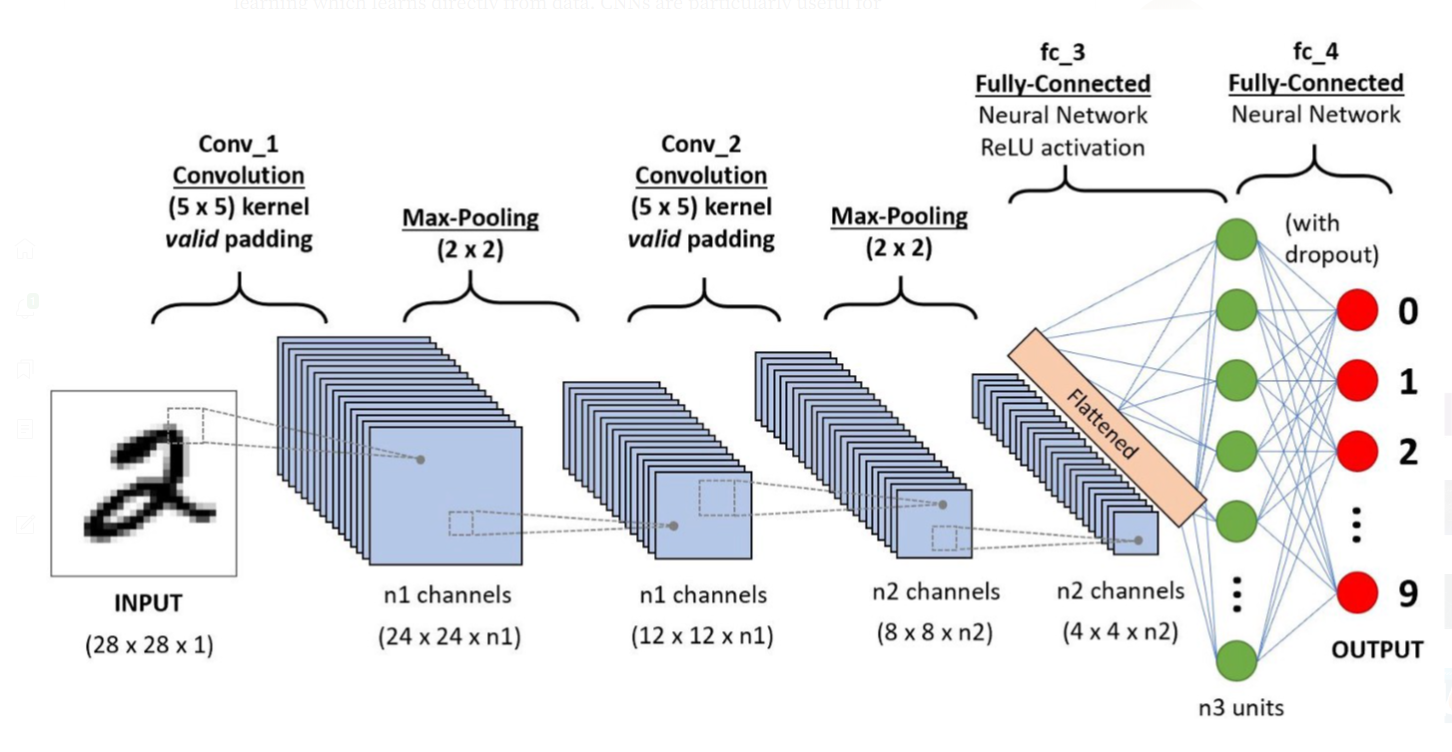

# 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# 2. Split Train & Test Set 

In [ ]:
#Split the date into training and test dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


8


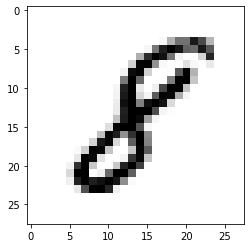

In [ ]:
#To visualize these numbers, we can get help from matplotlib.
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

8


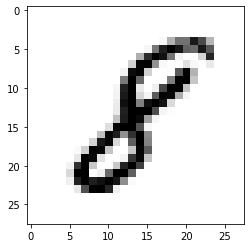

In [ ]:
# Normalize and print the image
x_train1 = x_train.astype('float32')
x_test1 = x_test.astype('float32')
x_train1 /= 255
x_test1 /= 255

print(y_train[image_index]) # The label is 8
plt.imshow(x_train1[image_index], cmap='Greys')

# 3. Reshaping and Normalizing the Images
> Typically, the image format has one dimension for rows (height), one for columns (width) and one for channels. If the image is black and white (grayscale), the channels dimension may not be explicitly present, e.g. there is one unsigned integer pixel value for each (row, column) coordinate in the image. Colored images typically have three channels, for the pixel value at the (row, column) coordinate for the red, green, and blue components.


> Deep learning neural networks require that image data be provided as three-dimensional arrays. This applies even if your image is grayscale. In this case, the additional dimension for the single color channel must be added.

> There are two ways to represent the image data as a three dimensional array. The first involves having the channels as the last or third dimension in the array. This is called “channels last“. The second involves having the channels as the first dimension in the array, called “channels first“.


  1.   Channels Last. Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].
  2.   Channels First. Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].

In [ ]:
# To be able to use the dataset in Keras API, we need 4-dims NumPy arrays. (Number of images * R * G * B)
# However, as we see above, our array is 3-dims. 
# In addition, we must normalize our data as it is always required in neural network models. 
# We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code).
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
print(x_train.shape[0])
print(x_test.shape[0])

print('x_train_shape : ', x_train.shape)

60000
10000
x_train_shape :  (60000, 28, 28, 1)


# 4. Nomalization of Training & Test Dataset

In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train_shape : ', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train_shape :  (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## **Why is convolution needed?**
The convolution operation helps un-cover useful features of an image by selectively increasing and decreasing the pixel intensities. These useful features help distinguish one image from the other, thus making the task of image recognition much more efficient.

For example, in the first example above, the convolution operation detects left-leaning diagonal lines. The second example detects left and right-leaning diagonal lines. The following examples help detect vertical and horizontal lines in the Kannada digit 9(“ombatu”).

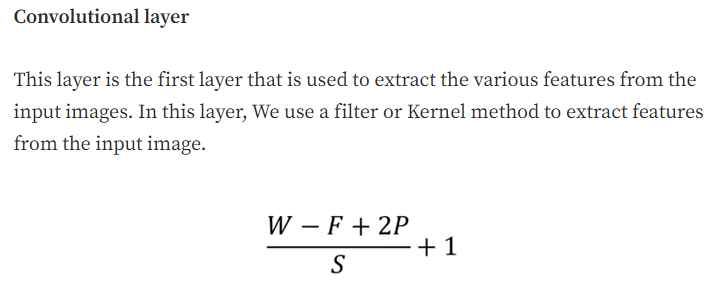

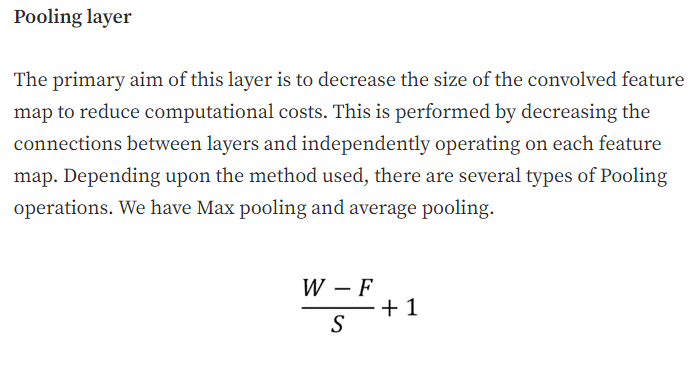

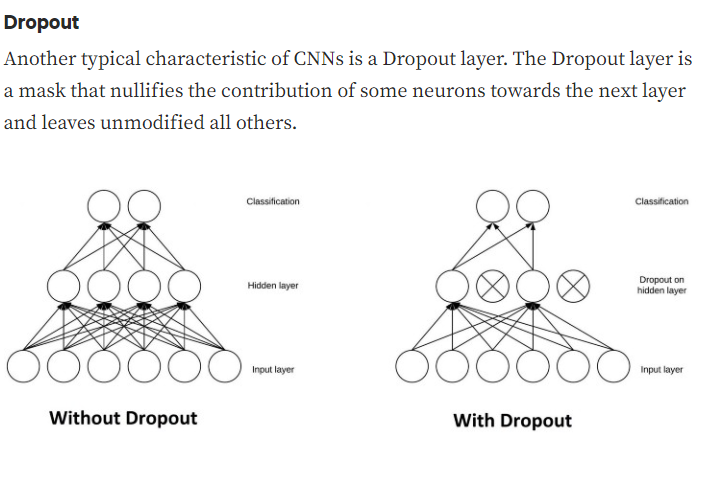

# 5. Creating Model

In [ ]:
#Creating a Sequential Model and adding the layers
#For stride = 1 and number of channels = 2
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape = (28,28,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

```
# tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None)
```



> **filters** : The first required Conv2D parameter is the 
number of filters that the convolutional layer will learn. Layers early in the network architecture (i.e., closer to the actual input image) learn fewer convolutional filters while layers deeper in the network (i.e., closer to the output predictions) will learn more filters.






# 6. Training Model
** A Comprehensive Guide on Deep Learning Optimizers**
> While training the deep learning model, we need to modify each epoch’s weights and minimize the loss function. An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy. 
1. Gradient Descent
2. Stochastic Gradient Descent
3. Stochastic Gradient descent with momentum
4. Mini-Batch Gradient Descent
5. Adagrad
6. RMSProp
7. AdaDelta
8. Adam

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
# model fit
history = model.fit(x_train, y_train, epochs=10, batch_size=200,validation_data=(x_test, y_test)).history

Epoch 1/10
300/300 [==============================] - 32s 105ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0408 - val_accuracy: 0.9898
Epoch 2/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0423 - val_accuracy: 0.9897
Epoch 3/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0444 - val_accuracy: 0.9901
Epoch 4/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0450 - val_accuracy: 0.9903
Epoch 5/10
300/300 [==============================] - 31s 105ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0455 - val_accuracy: 0.9901
Epoch 6/10
300/300 [==============================] - 33s 111ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0466 - val_accuracy: 0.9902
Epoch 7/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0453 - val_accura

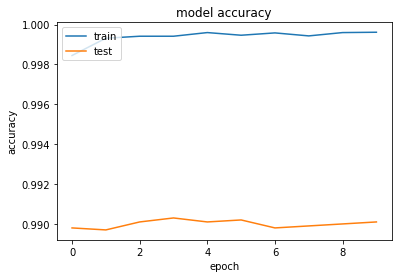

In [ ]:
#Accuracy along with epochs
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

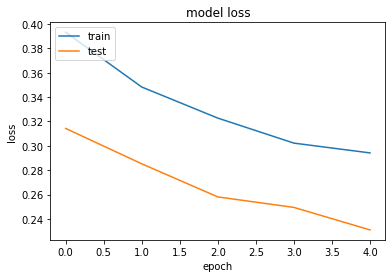

In [ ]:
#Loss along with epochs
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Evaluate :
> As the validation and training accuracy is same so the model is not overfitting. The accuracy is above 99%. So the model is not underfitting. So no need to hyperparameter tuning. Lets see the accuracy and loss plot of training and validation set.

In [ ]:
# Optional : Model Fit
model.fit(x = x_train, y = y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0063 - accuracy: 0.9976
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 4/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0058 - accuracy: 0.9979
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0068 - accuracy: 0.9975
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0043 - accuracy: 0.9985
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0042 - accuracy: 0.9987
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 40s 21m

# 7. Evaluate Model

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.0465 - accuracy: 0.9881


[0.04645272344350815, 0.988099992275238]

# 8. Check model with sample data

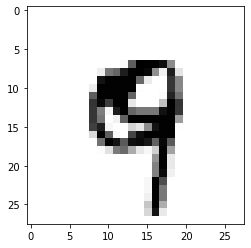

In [ ]:
#Sample image from test set
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [ ]:
#Using prediction
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

9
